In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series,DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.decomposition import PCA


In [103]:
Train=pd.read_csv('house_price_train.csv')
Test=pd.read_csv('house_price_test.csv')

In [104]:
Train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [105]:
Train.shape

(1460, 81)

In [106]:
Test.shape

(1459, 80)

In [107]:
#Data.isnull().sum()

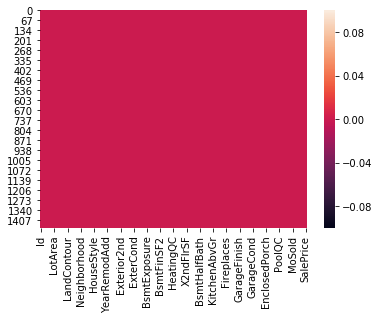

In [108]:
# finding the missing values
sns.heatmap(Train.isnull())

In [109]:
Train.columns[Train.isnull().any()]

Index([], dtype='object')

# Creating the dummies for the train and test data

In [110]:
##converting the dummies
Df_train=pd.get_dummies(Train)
Df_test=pd.get_dummies(Test)

In [111]:
Df_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=290)


# Applying the standard scaler

In [112]:
#apply standard scaler
sc=StandardScaler()
scaledtrain=sc.fit_transform(Df_train)
scaledtest=sc.fit_transform(Df_test)



C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [113]:
scaled_train=pd.DataFrame(scaledtrain)
scaled_train.columns=Df_train.columns
scaled_train.head()

scaled_test=pd.DataFrame(scaledtest)
scaled_test.columns=Df_test.columns
scaled_test.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730864,-0.874711,0.567330,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063428,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
1,-1.728490,-0.874711,0.615963,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063511,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
2,-1.726115,0.061351,0.275532,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773377,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
3,-1.723741,0.061351,0.470064,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357958,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
4,-1.721367,1.465443,-1.232092,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.387160,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365


In [114]:
scaled_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=290)

In [115]:
scaled_test.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=271)

In [116]:
y=scaled_train['SalePrice']

# PCA

In [117]:
####   PCA
pc=PCA(n_components=120)
finaltrain=pc.fit_transform(scaled_train)
finaltrain=pd.DataFrame(finaltrain)
# turning the data  as per the pca componet value
finaltest=pc.fit_transform(scaled_test)
finaltest=pd.DataFrame(finaltest)

In [118]:
finaltrain.shape

(1460, 120)

In [119]:
pc.explained_variance_ratio_

array([0.06964815, 0.03078814, 0.02458257, 0.02074759, 0.01781829,
       0.01647715, 0.01565199, 0.01314235, 0.01298249, 0.01206501,
       0.01156275, 0.01132442, 0.01107484, 0.01060225, 0.01030787,
       0.01010841, 0.00985969, 0.0095933 , 0.0094447 , 0.0094001 ,
       0.00920479, 0.00900473, 0.00875878, 0.00868352, 0.00851851,
       0.00844072, 0.00814504, 0.00796603, 0.00784056, 0.0077815 ,
       0.00769414, 0.00749127, 0.00730753, 0.00721412, 0.00705912,
       0.0069798 , 0.00693025, 0.0067588 , 0.00667865, 0.00660622,
       0.00658956, 0.00645002, 0.00627484, 0.00614452, 0.0061355 ,
       0.00604906, 0.00594054, 0.00590151, 0.00583359, 0.00578516,
       0.00571067, 0.00561624, 0.00553201, 0.00551321, 0.00547104,
       0.00540347, 0.00527891, 0.00527533, 0.0052545 , 0.00523033,
       0.00515284, 0.0050889 , 0.00504607, 0.00496879, 0.00486061,
       0.00480504, 0.00478874, 0.00474225, 0.00472454, 0.00468093,
       0.00465628, 0.0045685 , 0.0045454 , 0.00446945, 0.00446

In [120]:
pc.explained_variance_ratio_.sum()

0.840086396538483

In [121]:
lr=LinearRegression()
lr.fit(finaltrain,y)
pred_lr=lr.predict(finaltest)

In [122]:
# Creating the dataframe
Id=Test['Id'].values.tolist()
Prediction=pred_lr
d={'Id':Id,'SalePrice':Prediction}

In [123]:
pred_lr

array([-0.5458672 ,  0.86182267, -0.17696642, ..., -0.1910401 ,
       -0.39683216,  0.64224381])

In [124]:
scaledtarget=sc.fit_transform(pd.DataFrame(Train.SalePrice))

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [125]:
actual_sales=sc.inverse_transform(pred_lr)

In [126]:
solution=pd.DataFrame({'Id':Id,'saleprice':actual_sales})

In [127]:
solution.to_csv('Linear Model.csv')

In [128]:
pwd()

'C:\\Users\\HEMNATH\\Downloads\\unsupervised learning'

In [129]:
rf=RandomForestRegressor()
rf.fit(finaltrain,y)
y_pred_rf=rf.predict(finaltest)

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [130]:
y_pred_rf=sc.inverse_transform(y_pred_rf)
solution_rf=pd.DataFrame({'Id':Id,'saleprice':y_pred_rf})

In [131]:
solution_rf.to_csv('RandomForestRegressor.csv')

In [96]:
bagg=BaggingRegressor()
bagg.fit(finaltrain,y)
y_pred_bagg=bagg.predict(finaltest)

In [97]:
y_pred_bagg=sc.inverse_transform(y_pred_bagg)
solution_bagg=pd.DataFrame({'Id':Id,'saleprice':y_pred_bagg})

In [98]:
solution_bagg.to_csv('Bagging Regressor.csv')